## Observations and Insights 

### Bar chart
* According to the Bar plot the Drug Regimen with Capomulin with **230** measurements is the one with the highest value
* According to the Bar plot the Drug Regimen with Propriva with **156** measurements is the one with the lowest value

### Statistics summary
* The Drug regimen with Ketapril has the highest mean value for the Tumor volumne with **55.235638 mm3**

### Pie chart
* The sample with the given data shows that mice are almost equal in sex whit **49.3%** Female and **50.7%** Male

### Line plot
* Mouse s710 treated with Capomulin has a significant tumor reduction at the **40** timepoint

### Correlation
* The correlation between both factors (mouse weight and average tumor volume) is **0.84**. 
* It is inferred that exists a strong positive correlation when the mouse weight increases the average tumor volume too.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_data = mouse_metadata.merge(study_results, on='Mouse ID')
# Display the data table for preview
merged_mouse_data.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [2]:
# Checking the number of mice.
total_mice = len(merged_mouse_data['Mouse ID'].unique())
total_mice_df = pd.DataFrame({"Total mice":[total_mice]})
total_mice_df

,Total mice
0,249


In [3]:
## Total mice before merge
len(merged_mouse_data)

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = merged_mouse_data[merged_mouse_data.duplicated(['Mouse ID','Timepoint'])]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_mouse_data.drop_duplicates(subset=['Mouse ID','Timepoint'])

In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_data)

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
group_by_drug_regimen = clean_data.groupby("Drug Regimen")

mean     = group_by_drug_regimen['Tumor Volume (mm3)'].mean()
median   = group_by_drug_regimen['Tumor Volume (mm3)'].median()
variance = group_by_drug_regimen['Tumor Volume (mm3)'].var()
std_dev  = group_by_drug_regimen['Tumor Volume (mm3)'].std()
SEM      = group_by_drug_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary = pd.DataFrame({"Mean":mean,
                        "Median":median,
                        "Variance":variance,
                        "Standard Deviation":std_dev,
                        "SEM":SEM
                       })
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
group_by_drug_regimen['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

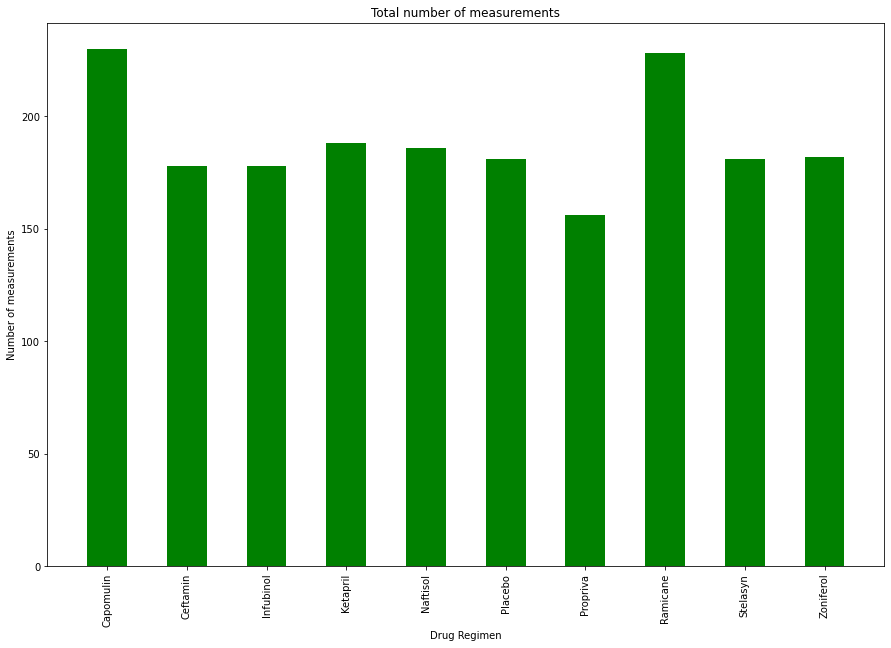

In [215]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurements = group_by_drug_regimen['Mouse ID'].count()

## Create Bar plot
plt.figure(figsize=(15, 10))
bar_chart =total_measurements.plot(kind='bar', color='g', width=0.5)
## Setting labels and properties

bar_chart.set_ylabel('Number of measurements')
bar_chart.set_title('Total number of measurements')
plt.xlim(-0.75, len(x_axis)-0.25)


plt.savefig("../Images/pandas_bar_plot.png", bbox_inches = "tight")
plt.show()

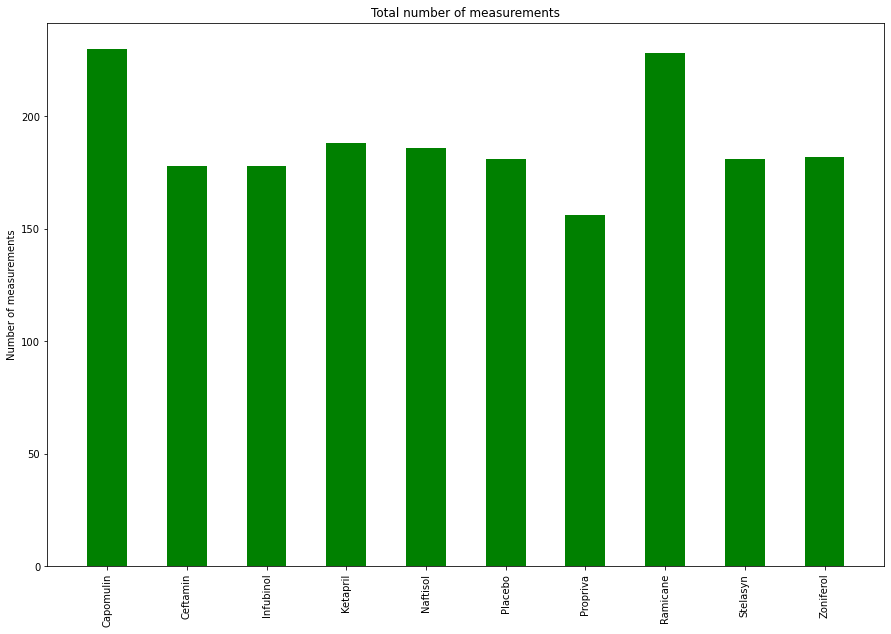

In [213]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
labels = total_measurements.index.tolist()
x_axis = np.arange(len(total_measurements))

## Create Bar plot
plt.figure(figsize=(15, 10))
plt.bar(x_axis, total_measurements, color="g", align="center", width=0.5)
## Setting labels and properties
plt.xticks([value for value in x_axis], labels, rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title('Total number of measurements')
plt.ylabel('Number of measurements')
plt.savefig("../Images/pyplot_bar_plot.png", bbox_inches = "tight")
plt.show()


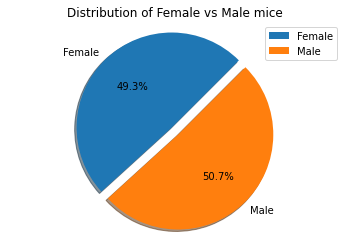

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_by_sex = clean_data.groupby("Sex")
sex_df = group_by_sex.count()

## Create Pandas pie plot
pie_chart = sex_df.plot(kind='pie', y='Mouse ID',startangle=45, autopct='%1.1f%%', explode=(0.1, 0), shadow=True)
## Setting labels and properties
pie_chart.set_ylabel('')
pie_chart.set_title('Distribution of Female vs Male mice')
plt.legend(labels=sex_df.index, loc="best")
plt.axis("equal")
plt.savefig("../Images/pandas_pie_plot.png", bbox_inches = "tight")
plt.show()


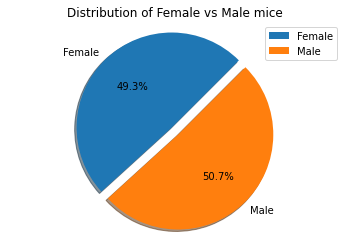

In [186]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_labels = sex_df.index.tolist()

## Create Pyplot pie plot
plt.pie(sex_df['Mouse ID'], labels=sex_labels,startangle=45, autopct='%1.1f%%', explode=(0.1, 0), shadow=True)
## Setting labels and properties
plt.title('Distribution of Female vs Male mice')
plt.legend(labels=sex_df.index, loc="best")
plt.axis("equal")
plt.savefig("../Images/pyplot_pie_plot.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [187]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatment_regimens = clean_data.loc[clean_data["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"]),:]

# Start by getting the last (greatest) timepoint for each mouse
grouped_by_Drug_and_mouse = four_treatment_regimens.groupby(['Drug Regimen', 'Mouse ID'])
max_timepoint = grouped_by_Drug_and_mouse['Timepoint'].max()
max_timepoint_df = max_timepoint.to_frame()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_regimens_data = max_timepoint_df.merge(clean_data, on=['Mouse ID','Timepoint','Drug Regimen'])
merged_regimens_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,45,Ramicane,Male,1,17,30.276232,0
96,u196,45,Ramicane,Male,18,25,40.667713,3
97,w678,5,Ramicane,Female,5,24,43.166373,0
98,y449,15,Ramicane,Male,19,24,44.183451,0


In [188]:
merged_regimens_data.loc[merged_regimens_data['Drug Regimen']=='Capomulin','Tumor Volume (mm3)']

0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [190]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_regimen in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    specific_drug_regimen = merged_regimens_data.loc[merged_regimens_data['Drug Regimen']==drug_regimen,:]
    
    quartiles = specific_drug_regimen['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    ## The statistics information
    print("---------------------------------------------------------------")
    print(f"Drug Regimen : {drug_regimen}")
    print("---------------------------------------------------------------")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")
    
    # add subset 
    tumor_vol_data.append(specific_drug_regimen['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print("---- Outliers ----")
    print(f"Values below {lower_bound} could be outliers for {drug_regimen}.")
    print(f"Values above {upper_bound} could be outliers for {drug_regimen}.")
    print("---------------------------------------------------------------\n")
    

---------------------------------------------------------------
Drug Regimen : Capomulin
---------------------------------------------------------------
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
---- Outliers ----
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
---------------------------------------------------------------

---------------------------------------------------------------
Drug Regimen : Ramicane
---------------------------------------------------------------
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
---- Outliers ----
Values below 17.912664470000003 could be

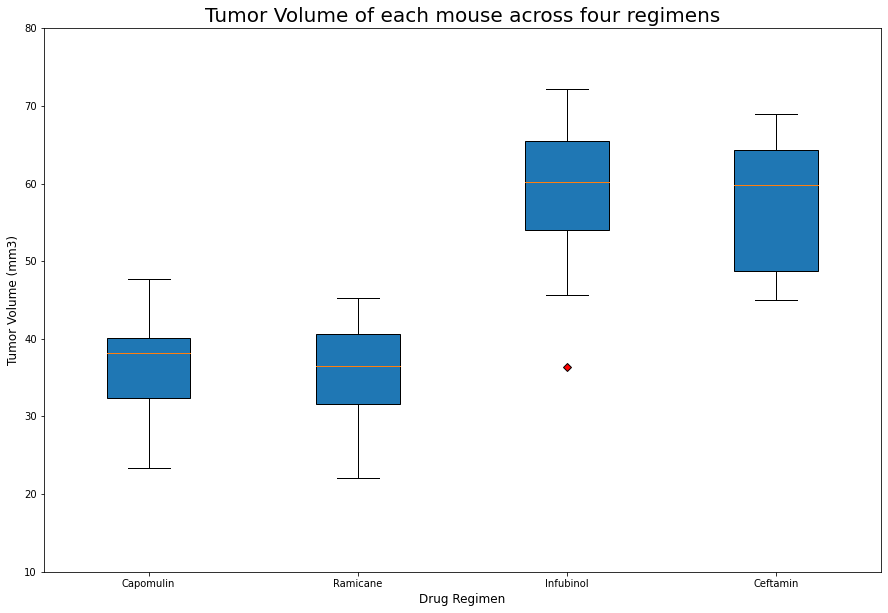

In [200]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume of each mouse across four regimens',fontsize =20)
ax1.set_ylabel('Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
red_diamond = dict(markerfacecolor='r', marker='D')
ax1.boxplot(tumor_vol_data, labels=treatments, widths = 0.4, patch_artist=True, vert=True, flierprops=red_diamond)

plt.ylim(10, 80)
plt.savefig("../Images/box_plot.png", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

In [201]:
## Show single mouse selected
capomulin_df = four_treatment_regimens.loc[four_treatment_regimens['Drug Regimen']=='Capomulin',:]
x = capomulin_df.loc[capomulin_df['Mouse ID'] == 's710',:]
x.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
361,s710,Capomulin,Female,1,23,0,45.000000,0
362,s710,Capomulin,Female,1,23,5,43.180977,0
363,s710,Capomulin,Female,1,23,10,43.688026,0
364,s710,Capomulin,Female,1,23,15,41.845235,0
365,s710,Capomulin,Female,1,23,20,42.629963,1


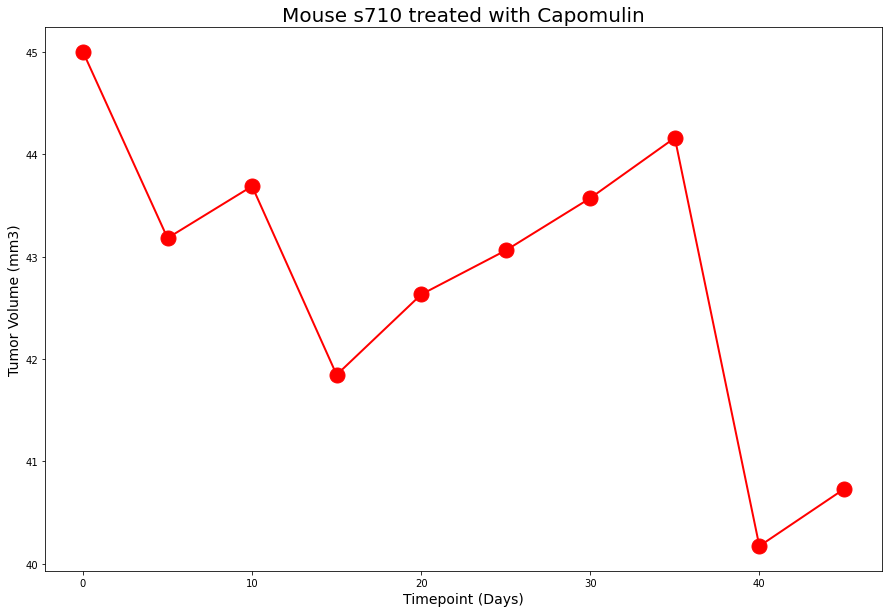

In [202]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = four_treatment_regimens.loc[four_treatment_regimens['Drug Regimen']=='Capomulin',:]
single_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 's710',:]

y_axis = single_mouse["Tumor Volume (mm3)"]
x_axis = single_mouse["Timepoint"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Mouse s710 treated with Capomulin',fontsize =20)
plt.plot(x_axis, y_axis,linewidth=2, markersize=15,marker="o",color="red")
plt.ylabel('Tumor Volume (mm3)',fontsize =14)
plt.xlabel('Timepoint (Days)',fontsize =14)


plt.savefig("../Images/line_plot.png", bbox_inches = "tight")
plt.show()

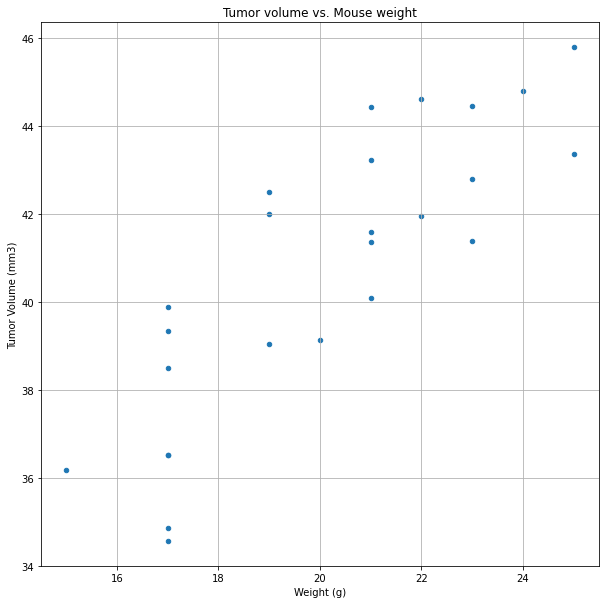

In [203]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = four_treatment_regimens.loc[four_treatment_regimens['Drug Regimen']=='Capomulin',:]
average_capomulin_df = capomulin_df.groupby('Mouse ID').mean()


average_capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", 
                          grid=True, figsize=(10, 10),
                          title="Tumor volume vs. Mouse weight")
plt.show()

## Correlation and Regression

In [204]:
average_capomulin_df.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


----------------------------------------------------------------------
The correlation between both factors is 0.84
y = 0.95x +21.55
The r-value is: 0.7088568047708717
----------------------------------------------------------------------


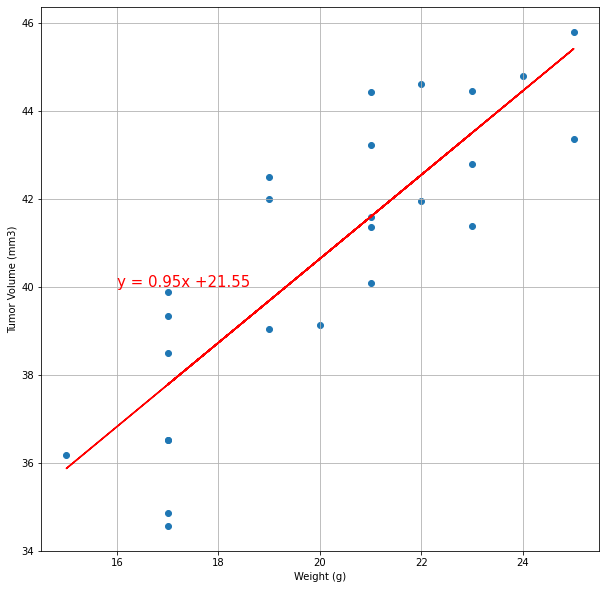

In [206]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mean_weight = average_capomulin_df.iloc[:,1]
mean_tumor = average_capomulin_df.iloc[:,3]
correlation = st.pearsonr(mean_weight,mean_tumor)

x_values = mean_weight
y_values = mean_tumor

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

## Get the line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

## Add properties to the plot
plt.figure(figsize=(10,10))
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(line_eq,(16,40),fontsize=15,color="red")
plt.grid()

## Create the Scatter plot and linear
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

## Print the calcuations
print("----------------------------------------------------------------------")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(line_eq)
print(f"The r-value is: {rvalue**2}")
print("----------------------------------------------------------------------")

## Show plot
plt.show()